In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers


In [4]:
data_train_path = "D:/Projects/Image Classifier/collection/Fruits_Vegetables/train"
data_test_path = "D:/Projects/Image Classifier/collection/Fruits_Vegetables/test"
data_validation_path = "D:/Projects/Image Classifier/collection/Fruits_Vegetables/validation"


In [17]:
img_width = 180
img_height = 180


In [21]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True, image_size=(img_width,img_height),batch_size=32,validation_split=False)
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,shuffle=False, image_size=(img_width,img_height),batch_size=32,validation_split=False)
data_val = tf.keras.utils.image_dataset_from_directory(data_validation_path,shuffle=False, image_size=(img_width,img_height),batch_size=32,validation_split=False)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names



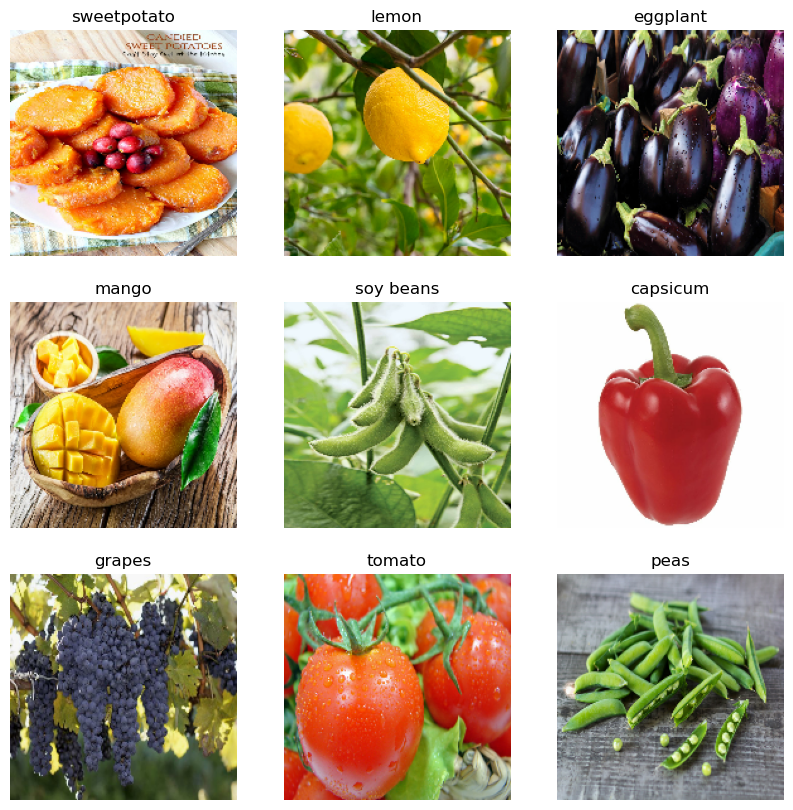

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [21]:
from tensorflow.keras.models import Sequential

In [19]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [37]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9884 - loss: 0.0203 - val_accuracy: 0.9601 - val_loss: 0.4708
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9867 - loss: 0.0213 - val_accuracy: 0.9630 - val_loss: 0.3918
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9870 - loss: 0.0184 - val_accuracy: 0.9601 - val_loss: 0.4246
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.9880 - loss: 0.0229 - val_accuracy: 0.9601 - val_loss: 0.4231
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.9886 - loss: 0.0194 - val_accuracy: 0.9573 - val_loss: 0.4187
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.9871 - loss: 0.0193 - val_accuracy: 0.9573 - val_loss: 0.5014
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.9895 - loss: 0.0229 - val_accuracy: 0.9573 - val_loss: 0.3966
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.9913 - loss: 0.0178 - val_accu

Text(0.5, 1.0, 'Loss')

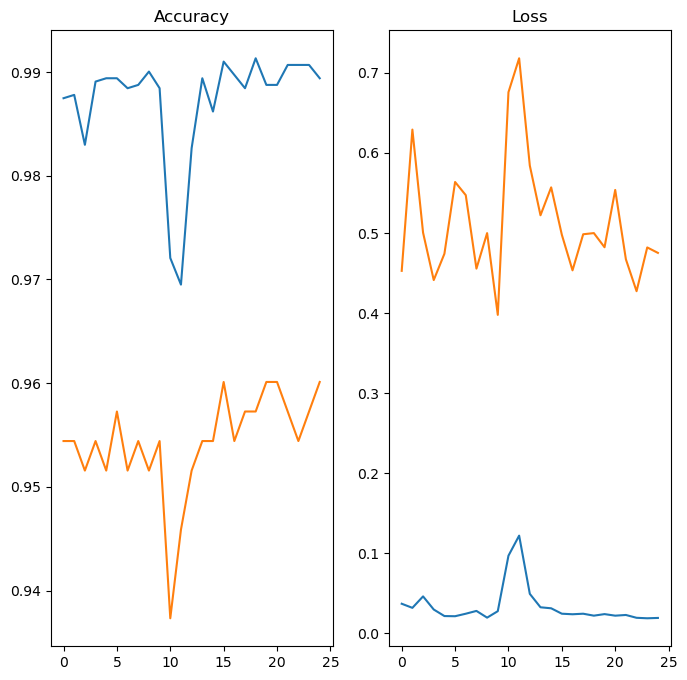

In [42]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [23]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

FileNotFoundError: [Errno 2] No such file or directory: 'corn.jpg'